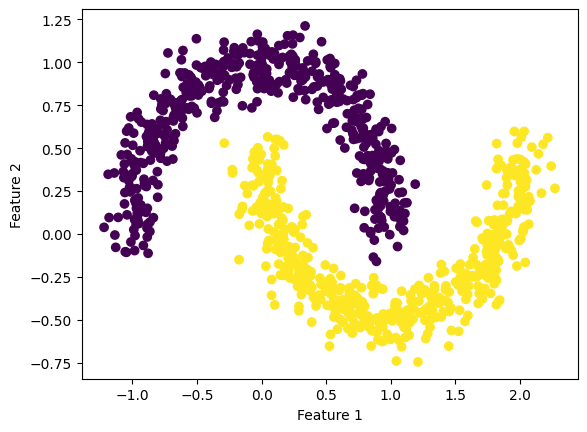

Test accuracy: 91.50%


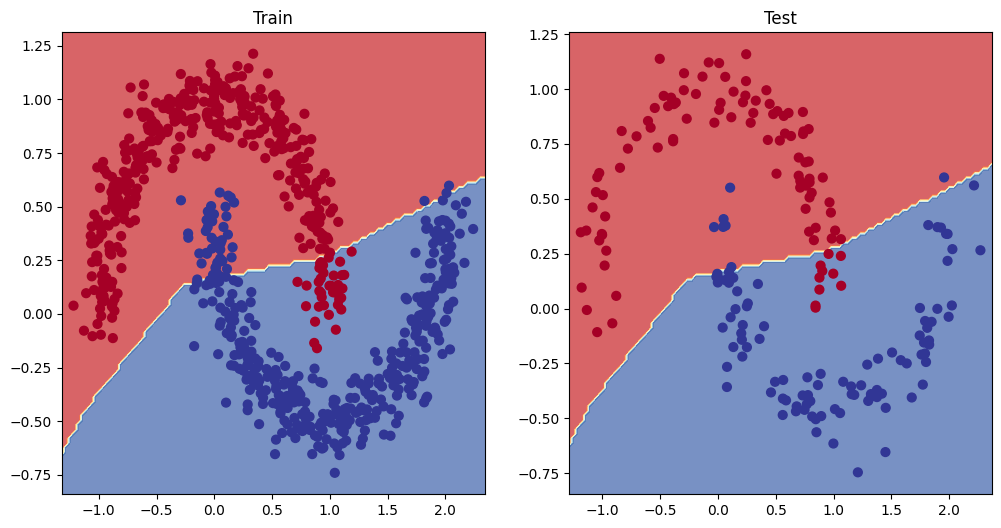

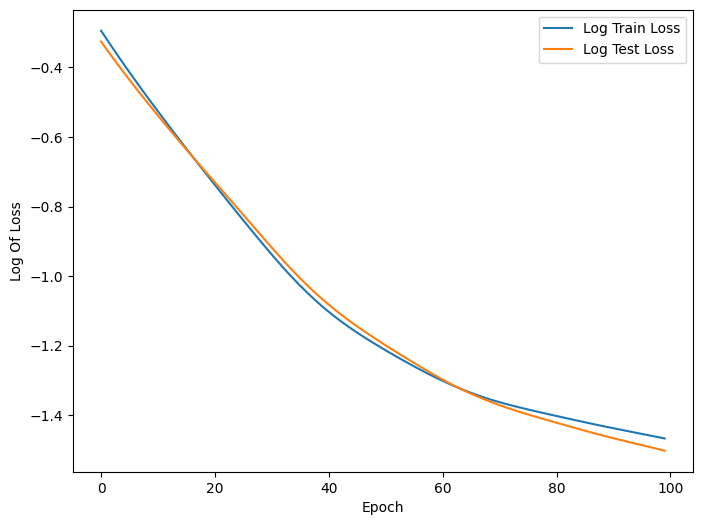

In [66]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.optim as optim
torch.manual_seed(42)

# Generate make_moons dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)  # Two output classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Create the model and optimizer
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
loss_fn = nn.CrossEntropyLoss()
train_losses = []  # To store train losses during training
test_losses = []

epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Append train loss to the list
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_losses.append(test_loss.item())

# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test accuracy: {accuracy * 100:.2f}%')

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        _, y_pred = torch.max(y_logits, 1)

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)  # Fix the model name here
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)  # Fix the model name here

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), np.log(train_losses), label='Log Train Loss')
plt.plot(range(epochs), np.log(test_losses), label='Log Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Of Loss')
plt.legend()
plt.show()

I started with Adam optimizer. It gives 91.5%. Let's try SGD now.


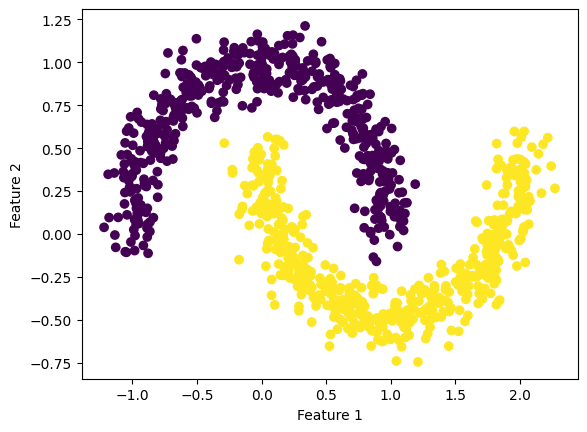

Test accuracy: 75.50%


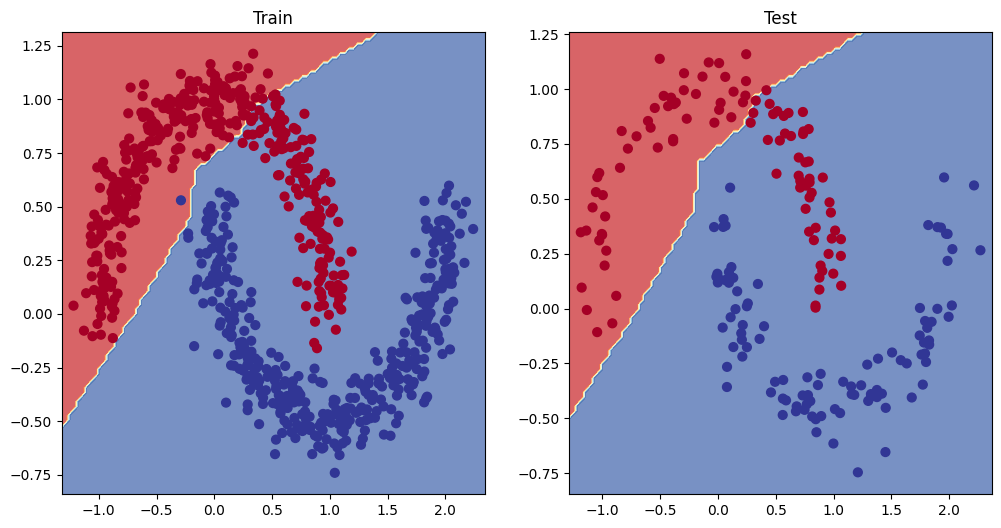

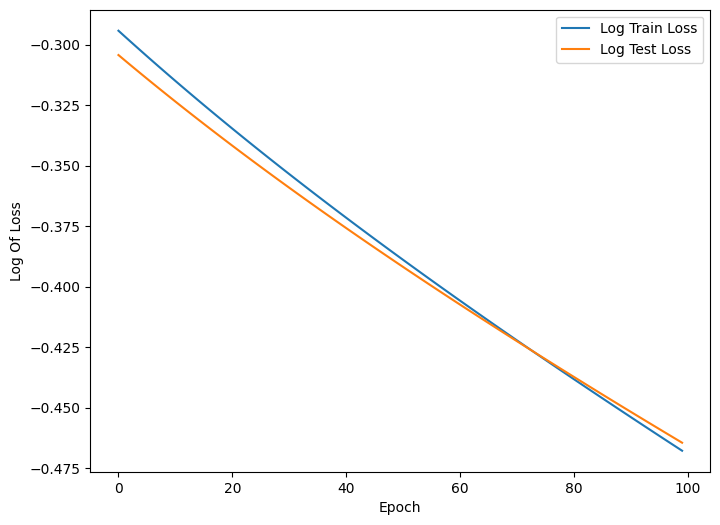

In [85]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.optim as optim
torch.manual_seed(42)

# Generate make_moons dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)  # Two output classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Create the model and optimizer
model = SimpleModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
loss_fn = nn.CrossEntropyLoss()
train_losses = []  # To store train losses during training
test_losses = []

epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Append train loss to the list
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_losses.append(test_loss.item())

# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test accuracy: {accuracy * 100:.2f}%')


def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        _, y_pred = torch.max(y_logits, 1)

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)  # Fix the model name here
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)  # Fix the model name here

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), np.log(train_losses), label='Log Train Loss')
plt.plot(range(epochs), np.log(test_losses), label='Log Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Of Loss')
plt.legend()
plt.show()

SGD is still worse than Adam optimizer. Let's return to Adam and tune the learning rate and the number of epochs.

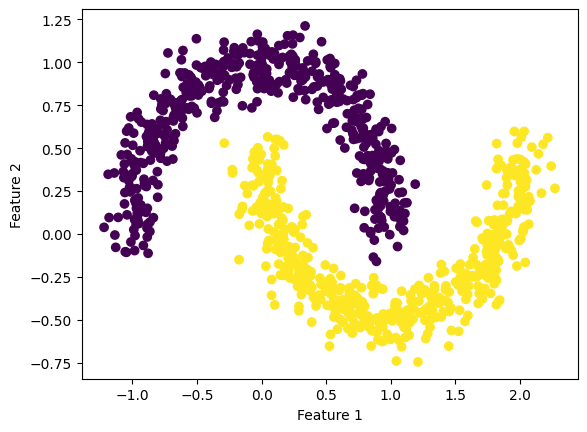

Test accuracy: 95.50%


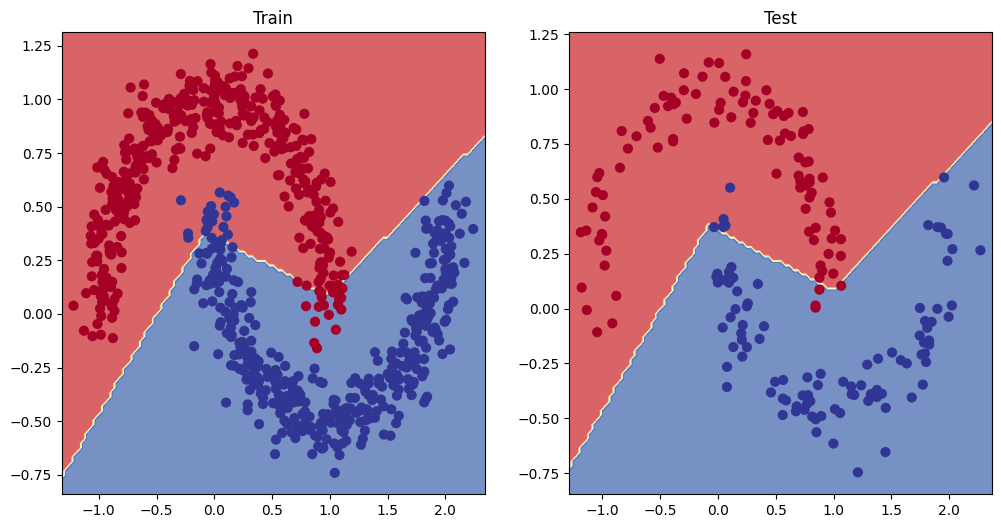

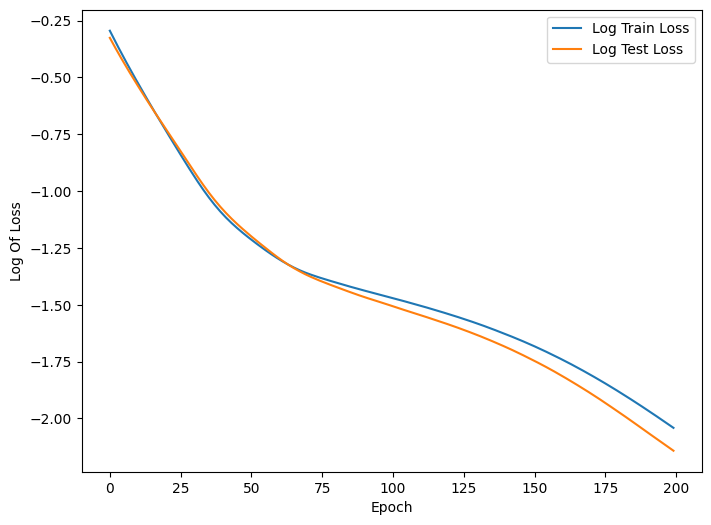

In [87]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.optim as optim
torch.manual_seed(42)

# Generate make_moons dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)  # Two output classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Create the model and optimizer
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# Training the model
loss_fn = nn.CrossEntropyLoss()
train_losses = [] # To store train losses during training
test_losses = []

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Append train loss to the list
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_losses.append(test_loss.item())

# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test accuracy: {accuracy * 100:.2f}%')

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        _, y_pred = torch.max(y_logits, 1)

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)  # Fix the model name here
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)  # Fix the model name here

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), np.log(train_losses), label='Log Train Loss')
plt.plot(range(epochs), np.log(test_losses), label='Log Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Of Loss')
plt.legend()
plt.show()

By increasing epochs to 200, I easily get 95.5% even with a small learning rate. Now, let's increase the learning rate.

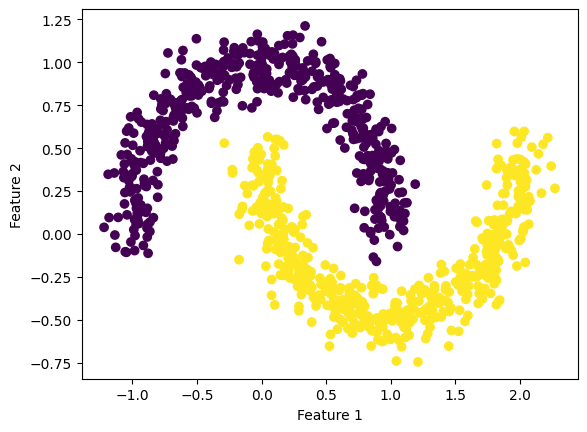

Test accuracy: 100.00%


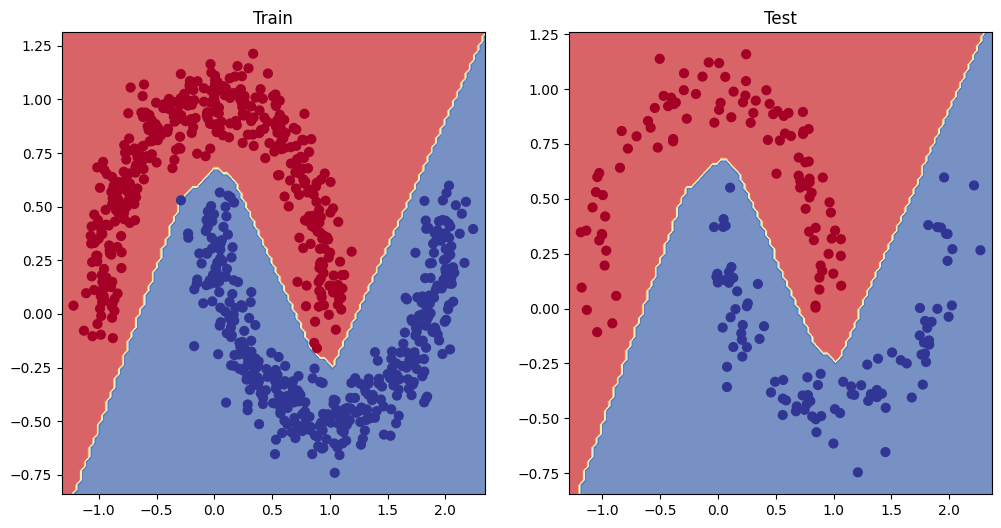

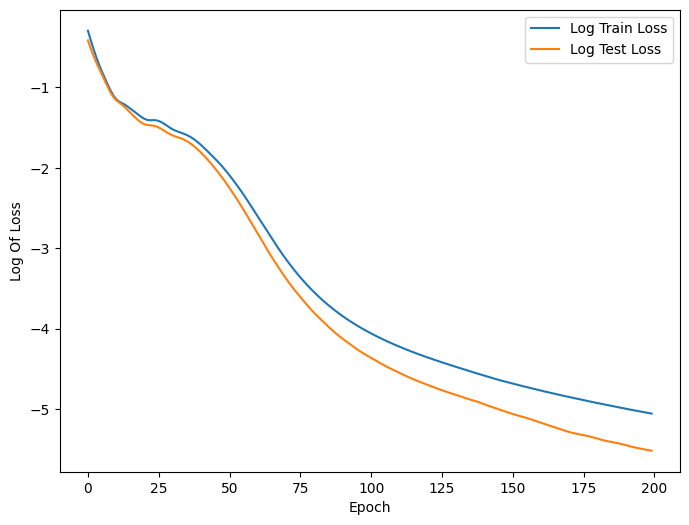

In [90]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.optim as optim
torch.manual_seed(42)

# Generate make_moons dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)  # Two output classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Create the model and optimizer
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.05)

# Training the model
loss_fn = nn.CrossEntropyLoss()
train_losses = []  # To store train losses during training
test_losses = []

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Append train loss to the list
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_losses.append(test_loss.item())

# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test accuracy: {accuracy * 100:.2f}%')


def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        _, y_pred = torch.max(y_logits, 1)

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)  # Fix the model name here
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)  # Fix the model name here

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), np.log(train_losses), label='Log Train Loss')
plt.plot(range(epochs), np.log(test_losses), label='Log Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Of Loss')
plt.legend()
plt.show()

Making lr=0.05 I managed to get 100% test accuracy rate. What's weird is that Test Log-Loss is smaller than Training Log-Loss. That is due to the small sample size and some point being boundary on training dataset, but not a lot of them on the boundary for for a more sctrict boundary learning.